In [1]:
import tensorflow as tf
import pandas as pd
import numpy as  np

In [2]:
dataFrame = pd.read_excel('maliciousornot.xlsx')

In [3]:
dataFrame.head()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [6]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [7]:
import matplotlib.pyplot as plt
import seaborn as sbn

<Axes: xlabel='Type', ylabel='count'>

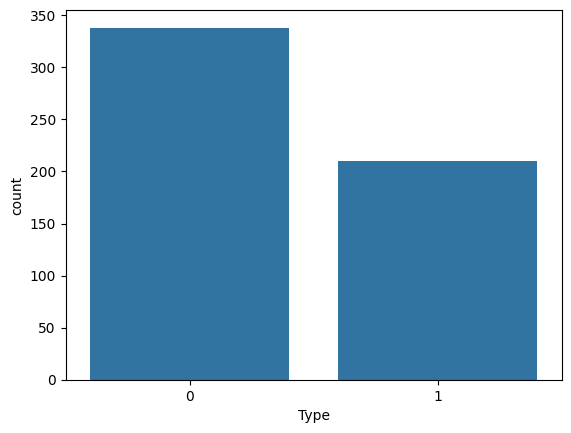

In [8]:
sbn.countplot(x='Type', data = dataFrame)

<Axes: >

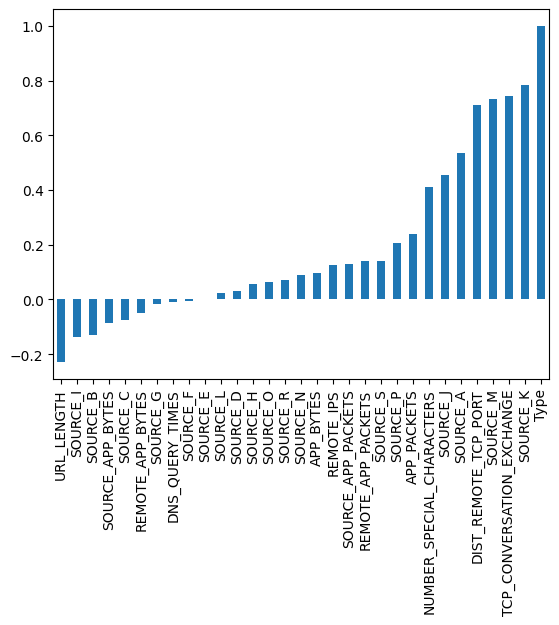

In [9]:
dataFrame.corr()["Type"].sort_values().plot(kind = 'bar')

In [10]:
y = dataFrame['Type'].values
x = dataFrame.drop('Type',axis = 1).values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=.2,
    random_state=42,
)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from tensorflow import keras

In [16]:
x_train.shape

(438, 30)

In [107]:
model = keras.Sequential([
    keras.layers.Dense(units=30,activation='relu'),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=15,activation = 'relu'),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=15,activation = 'relu'),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=1,activation = 'sigmoid'),
    ])

In [109]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
)

In [111]:
earlyStopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience=25,
    verbose=1,
    mode='min' #loss degerimizi min tutmaya calisiyoruz
)

In [113]:
with tf.device('/GPU:0'):
    model.fit (x_train,y_train,epochs=200,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/200
14/14 [==============================] - 0s 8ms/step - loss: 0.6859 - val_loss: 0.6901
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6758 - val_loss: 0.6819
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6601 - val_loss: 0.6722
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6411 - val_loss: 0.6521
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6132 - val_loss: 0.6215
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5683 - val_loss: 0.5774
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5336 - val_loss: 0.5268
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4725 - val_loss: 0.4781
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4202 - val_loss: 0.4235
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3715 - val_loss: 0.3830
Epoch 11/

<Axes: >

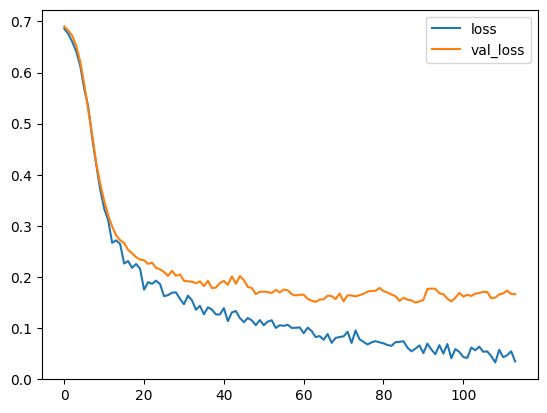

In [115]:
modelKaybi = pd.DataFrame(model.history.history)
modelKaybi.plot()

In [183]:
from sklearn.metrics import confusion_matrix,classification_report

In [185]:
tahminler = model.predict(x_test)
tahminler = tf.math.round(tahminler)
tahminler

4/4 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(110, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
 

In [187]:
cm = confusion_matrix(y_test,tahminler)
cm

array([[55,  2],
       [ 2, 51]], dtype=int64)

In [191]:
print(classification_report(y_test,tahminler))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        57
           1       0.96      0.96      0.96        53

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110

